<a href="https://colab.research.google.com/github/lolovlad/colab/blob/master/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Графики

Что делать, если данных много, а построить график хочется? Разглядывать сотни тысяч точек сложно. Значит, визуализировать нужно сгруппированные данные или срез. В этом уроке вы построите график по готовому срезу id == '3c1e4c52'. Начнём с основ.
За построение графиков в Pandas отвечает метод **plot()** (англ. «график»). Вот простой пример:


   a   b
0  2   4
1  3   9
2  4  16
3  5  25


<Axes: >

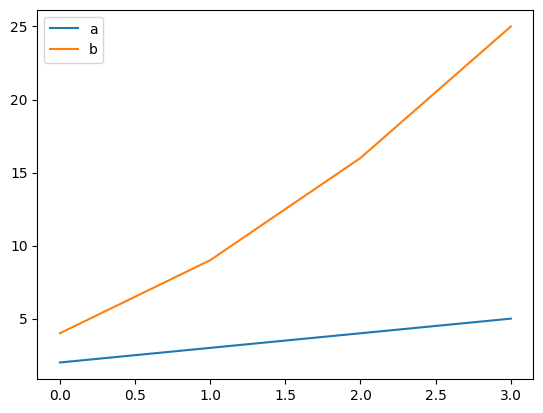

In [1]:
import pandas as pd
df = pd.DataFrame({'a': [2, 3, 4, 5], 'b': [4, 9, 16, 25]})
print(df)
df.plot()


Метод **plot()** построил графики по значениям столбцов из датафрейма. На оси абсцисс (x) расположились индексы, а на оси ординат (y) — значения столбцов.
Названия для графиков указывают строкой или переменной в параметре **title** (англ. «название»):


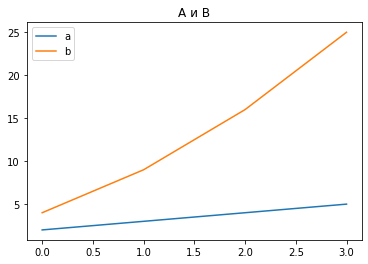

In [ ]:
df.plot(title='A и B')

Элементов в таблице слишком мало, чтобы они складывались в непрерывную линию. Добавим графику точности, передадим параметр **style**, со значением 'o', чтобы отметить значения таблицы точками.

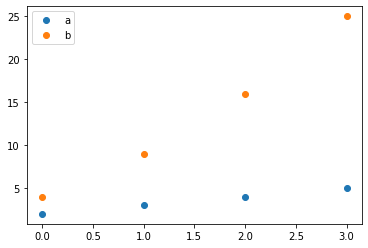

In [ ]:
df.plot(style='o') # 'o' похожа на кружок или точку, запомнить легко

Можно задать и другую форму точек. Например, **style='х'** пометит точки крестиками:

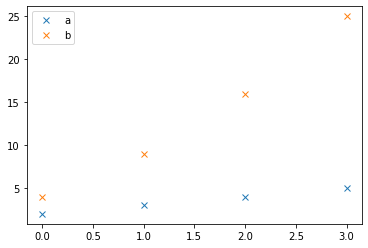

In [ ]:
df.plot(style='x') # 'x' - точь-в-точь крестик

Когда нужен компромиссный вариант: и линии, и точки; передают -**style='o-'**.

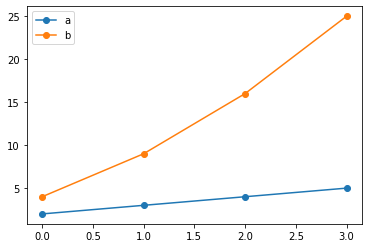

In [ ]:
df.plot(style='o-') # 'o-' - кружок и линия

Напомним, что по горизонтальной оси отложены индексы. Но что, если такой способ представления не годится для анализа? Можно изменить сами индексы или передать методу **plot()** параметры осей. Так, оси абсцисс (x) присвоим значения столбца 'b', а оси ординат (y) — значения столбца 'a':

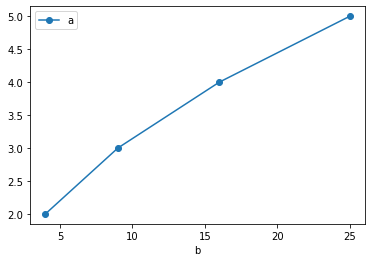

In [ ]:
df.plot(x='b', y='a', style='o-')

По оси абсцисс идут значения столбца b, а по оси ординат — значения столбца a. Обратите внимание, что Pandas переименовал горизонтальную ось: теперь она — b. А в легенде (списке условных обозначений на графике) осталась только линия со значениями столбца a.

Ещё не всё идеально: точки упираются в края графика. Скорректируем границы параметрами **xlim** и **ylim** — с ними вы познакомились, когда изучали ящик с усами. Напомним, что параметрам **xlim** и **ylim** в скобках передают минимальное и максимальное значение. Ограничим ось абсцисс значениями от 0 до 30:


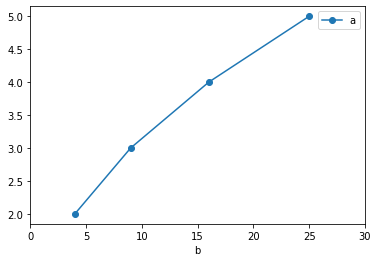

In [ ]:
df.plot(x='b', y='a', style='o-', xlim=(0, 30))

Добавим линии сетки: с ними будет легче понять, какие именно значения отображены. Укажем параметр **grid** (англ. «сетка, решётка»), равный **True** (это значит, что отображать сетку — нужно):

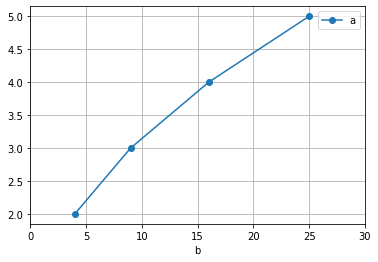

In [ ]:
df.plot(x='b', y='a', style='o-', xlim=(0, 30), grid=True)

Размером графика управляют через параметр **figsize** (от англ. size of a figure — «размер фигуры»). Ширину и высоту области построения в дюймах передают параметру в скобках: **figsize = (x_size, y_size)**. Сравним графики с разными размерами:

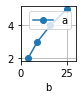

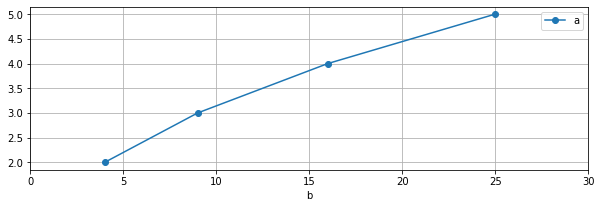

In [ ]:
# строим маленький график
df.plot(x='b', y='a', style='o-', xlim=(0, 30), grid=True, figsize=(1, 1))

# строим большой график
df.plot(x='b', y='a', style='o-', xlim=(0, 30), grid=True, figsize=(10, 3));


Вот вы и знаете о построении графиков так много, что справитесь с визуальным представлением срезов данных по АЗС.

### Задача 1

Сделайте срез из данных по АЗС с id == "3c1e4c52". Сохраните в переменной sample.
Постройте график зависимости продолжительности заправки от времени заезда. За основу возьмите соответствующие столбцы **'time_spent'** и **'local_time'**.

Каждый заезд должен выглядеть как отдельная точка, не соединённая линиями с другими точками. Для этого вам потребуется маркер 'o'.

Ограничьте график значениями до 1000 секунд. Нарисуйте линии сетки. Увеличьте размер графика до 12 дюймов по горизонтали и 6 по вертикали.

Напомним, что на прошлом занятии значения данных столбцов были скорректированы:

**data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')**

**data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)**

**sample = data.query('id == "3c1e4c52"')**


<Axes: xlabel='time_spent'>

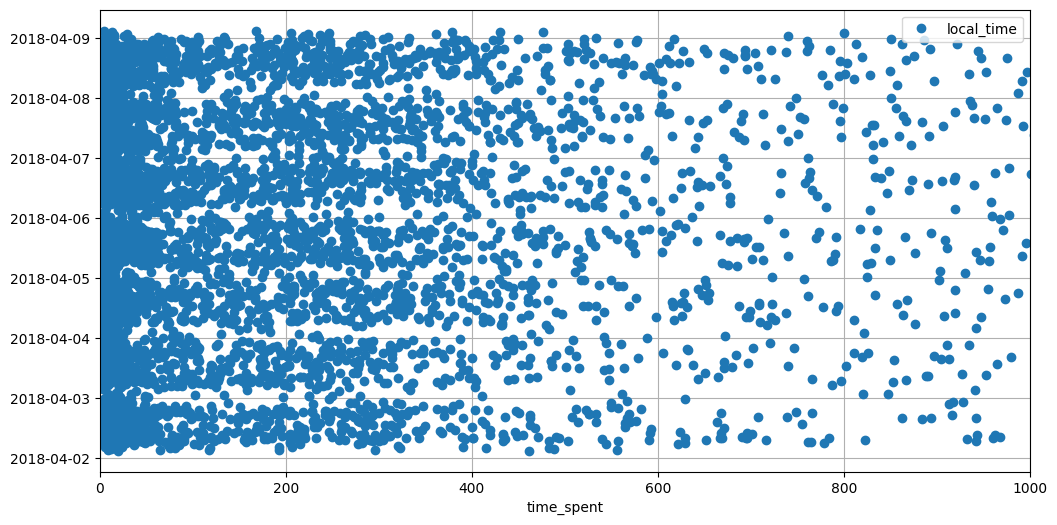

In [5]:
import pandas as d
data = pd.read_csv('visits.csv', sep = '\t')
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')

data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)

sample = data.query('id == "3c1e4c52"')


sample.plot(x='time_spent', y='local_time', style='o', xlim=(0, 1000), grid=True, figsize=(12, 6))

## Группировка с pivot_table()

На графике видна структура с провалами плотности в районе ночных часов. Это кажется правдоподобным: машин и, как следствие, заправок ночью меньше.

Подозрительно коротких заездов (с продолжительностью менее 100 секунд) много в любое время суток. Хотя график строили по срезу, данных будто не стало меньше. Точки сливаются, делать по ним уверенные выводы трудно. Попробуем улучшить визуальное представление группировкой данных.
Прежде чем строить красивый график, позаботимся о красивом коде. В прошлом уроке вы сохранили срез в переменной **sample**, и к ней применили метод **plot()**.

Такой код хорош, когда к sample обращаются и дальше, в будущих расчётах. А если это не так? Введение новой сущности ради построения графика путает больше, чем упрощает.

Не будем множить сущности без необходимости и избавимся от промежуточных переменных. Применим метод **plot()** к результату работы **query()** безо всяких **sample**.

Получится конструкция вида:

**data.query().plot()**

Передадим нужные параметры. Чтобы код было легко читать, запишем его в несколько строк. Так код выглядит яснее:



<Axes: xlabel='local_time'>

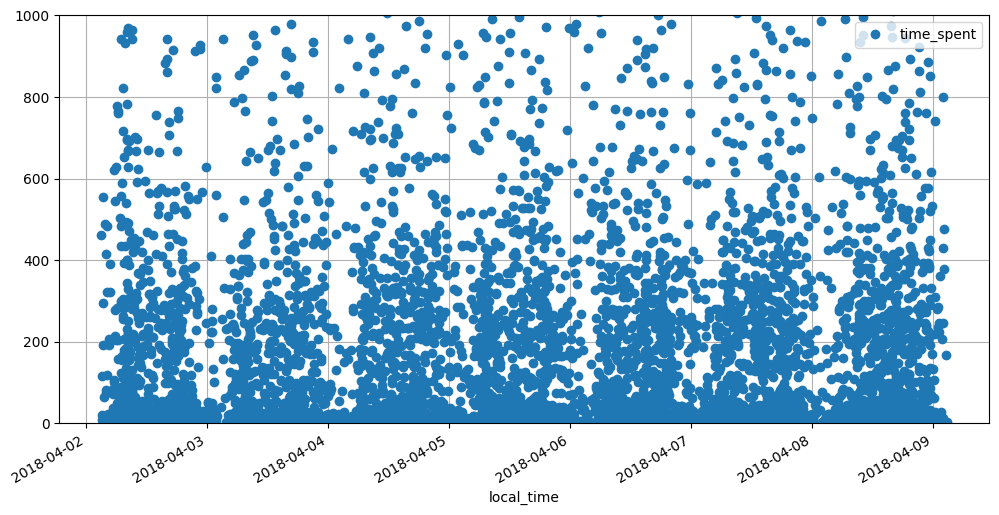

In [6]:
data.query('id == "3c1e4c52"').plot(
        x='local_time',
        y='time_spent',
        ylim=(0, 1000),
        style='o',
        grid=True,
        figsize=(12, 6),)


# одна команда в несколько строк: не забыть обрамить конструкцию в скобки


Вернёмся к данным по АЗС. На графике слишком много точек. Чтобы сделать его нагляднее, будем отмечать не визит, а среднюю продолжительность заправки в час. Вы уже создавали столбец **'date_hour'** с округлённым временем заезда на АЗС.
Обратимся к **pivot_table()**. Добавим сводную таблицу в цепочку между **query()** и **plot()**:


<Axes: xlabel='date_hour'>

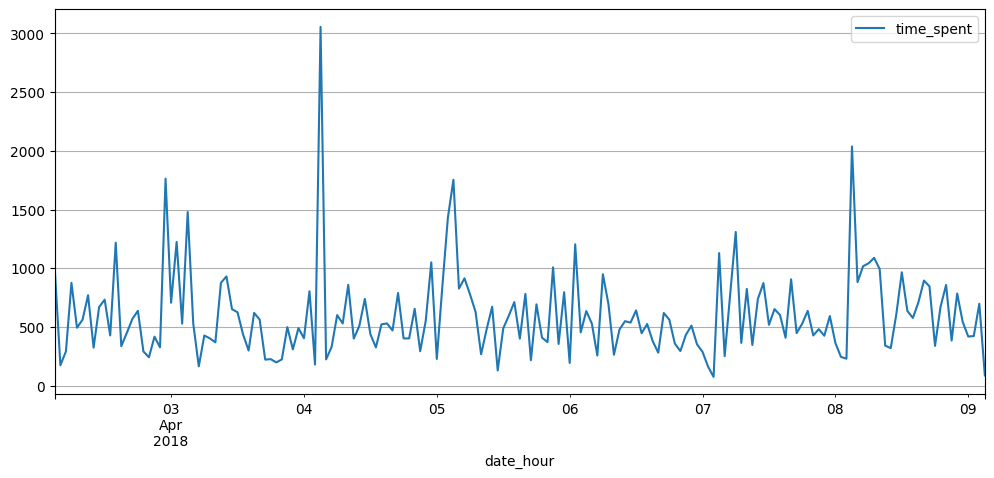

In [7]:
data['date_hour'] = data['local_time'].dt.round('1H')
data.query('id == "3c1e4c52"').pivot_table(index='date_hour', values='time_spent').plot(grid=True, figsize=(12, 5))


На графике показана средняя продолжительность заправки на АЗС под номером "3c1e4c52" за каждый час. Обратите внимание, что в среднем водители проводят на АЗС около 500 секунд. Помня о пике гистограммы в 200 секунд, нельзя не удивиться такому значению.

![image.png](attachment:image.png)

Есть на графике и таинственный пик, когда среднее время заправки достигло 3000 секунд (почти час). Многовато. В прошлых уроках мы вообще отбрасывали заезды дольше 1000 секунд, ведь они не слишком похожи на правду. Добавим соответствующее условие в **query()**:

<Axes: xlabel='date_hour'>

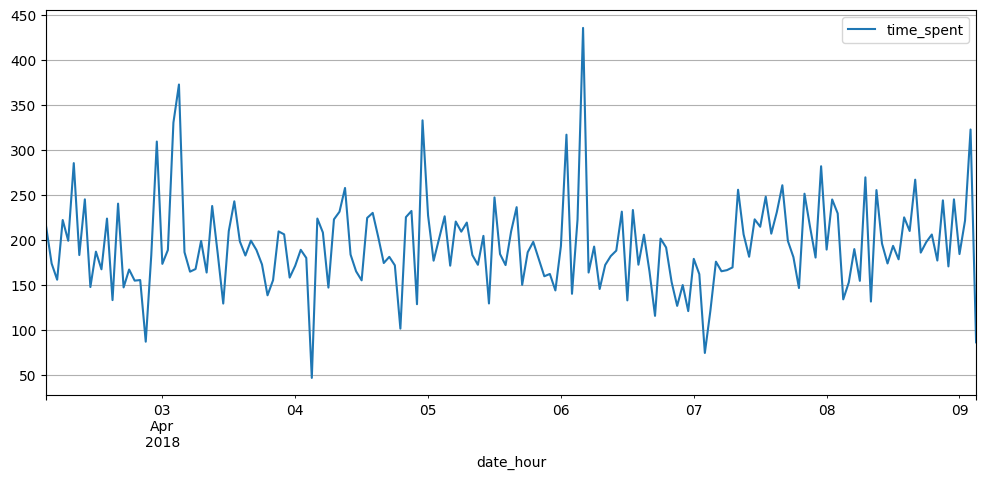

In [8]:
data.query('id == "3c1e4c52" and time_spent < 1000').pivot_table(index='date_hour', values='time_spent').plot(grid=True, figsize=(12, 5))


Средняя продолжительность заправки снизилась вполовину! Вот вы и увидели, как выбросы влияют на среднее.
Вычислим устойчивую к выбросам медиану. В **pivot_table()** значением параметра **aggfunc** передадим **'median'**.

Напомним, что в **aggfunc** передают функцию, которую применяют к значениям сводной таблицы. Например, метод **'count'** посчитает число значений в группе. Если в **aggfunc** не указать ничего, отработает расчёт среднего: **'mean'**.


<Axes: xlabel='date_hour'>

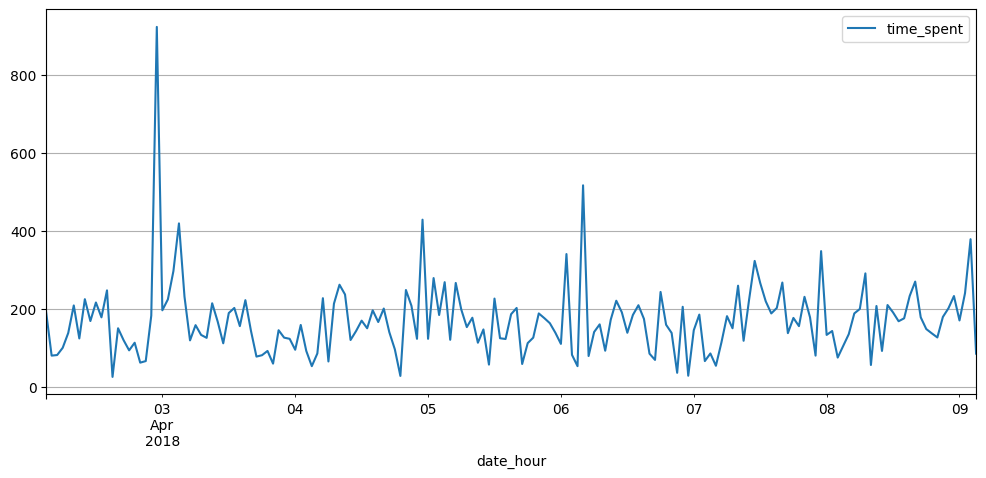

In [9]:
data.query('id == "3c1e4c52"').pivot_table(index='date_hour', values='time_spent', aggfunc='median').plot(grid=True, figsize=(12, 5))


Обратите внимание, что даже без фильтра **'time_spent < 1000'** медиана дала среднюю продолжительность заправки примерно в 200 секунд. Медиана устойчива к выбросам, но всё же не безупречна: пик более 800 секунд в ночь со 2-го на 3-е апреля выглядит аномальным значением.

В целом нет никакой явной связи между продолжительностью заезда и временем дня. Это странно. На этой АЗС не бывает очередей? Или что-то не так с данными? Число заездов в течение дня точно должно меняться. Проверьте это.


### Задача 2.

Постройте график числа заездов на АЗС с **id == "3c1e4c52"** по данным сводной таблицы с аргументами **index='date_hour'**, **values='time_spent'**. Параметру aggfunc установите значение **'count'**.
Добавьте на график сетку. Задайте размер 12 на 5 дюймов в параметре **figsize**.


<Axes: xlabel='date_hour'>

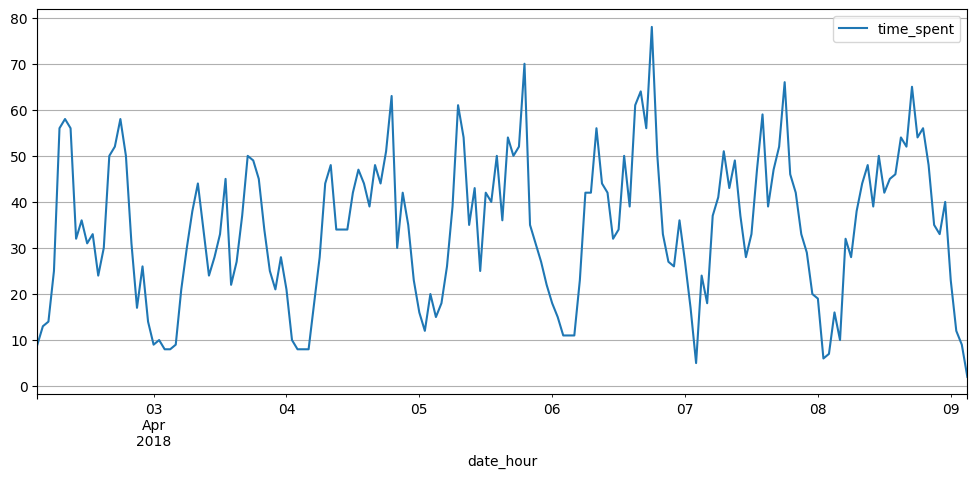

In [10]:
data.query('id == "3c1e4c52"').pivot_table(index='date_hour', values='time_spent', aggfunc='count').plot(grid=True, figsize=(12, 5))


# Помечаем срез данных

Продолжительность заправки около 0 секунд всё ещё выглядит необъяснимо странной. Неужели такие заезды придётся отбросить? Мы уже сделали это с подозрительно долгими заправками, признав их выбросами. Однако сверхкоротких заездов гораздо больше, чем очень долгих. Если мы от них избавимся, то наверняка сильно исказим данные.
Как много строк мы потеряем, если просто отбросим подозрительно короткие события? Посчитаем долю заездов на АЗС продолжительностью менее 60 секунд:


In [11]:
# делим количество заездов короче 60 секунд на общее число заездов
print(len(data.query('time_spent < 60')) / len(data))


0.42213910893586964


Таких аномально быстрых заездов у нас 42%. Очень много.

Насколько равномерно они распределены по разным АЗС? Везде около 40%? Или где-то их нет, а на каких-то АЗС много? Сгруппируем данные по АЗС и выясним, откуда взялось такое среднее.

Чтобы узнать, как получилось такое среднее, строят и изучают гистограмму.
Для каждой АЗС найдём среднее число аномально быстрых заездов. Пометим их и сгруппируем данные по АЗС. И по этим значениям уже построим гистограмму.


### Задача 3
Создайте столбец **data['too_fast']** (англ. too fast, «слишком быстрый»), со значениями:
•	**True** — если время заезда менее 60 секунд
•	**False** — если от 60 секунд
Напечатайте первые 5 строк data.


In [31]:
data['too_fast'] = data['time_spent'] < 60
data['too_fast'] = data['too_fast'].astype("int")
data.head(10)

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow
0,2018-04-06 16:53:58,76144fb2,98.0,Василек,2018-04-06 19:53:58,2018-04-06 20:00:00,0,0
1,2018-04-04 17:39:13,76144fb2,15.0,Василек,2018-04-04 20:39:13,2018-04-04 21:00:00,1,0
2,2018-04-03 17:28:24,76144fb2,220.0,Василек,2018-04-03 20:28:24,2018-04-03 20:00:00,0,0
3,2018-04-07 07:04:41,76144fb2,19.0,Василек,2018-04-07 10:04:41,2018-04-07 10:00:00,1,0
4,2018-04-04 13:20:49,76144fb2,14.0,Василек,2018-04-04 16:20:49,2018-04-04 16:00:00,1,0
5,2018-04-03 14:42:34,76144fb2,5.0,Василек,2018-04-03 17:42:34,2018-04-03 18:00:00,1,0
6,2018-04-02 08:23:21,76144fb2,555.0,Василек,2018-04-02 11:23:21,2018-04-02 11:00:00,0,0
7,2018-04-07 00:34:08,76144fb2,286.0,Василек,2018-04-07 03:34:08,2018-04-07 04:00:00,0,0
8,2018-04-04 08:47:11,76144fb2,14.0,Василек,2018-04-04 11:47:11,2018-04-04 12:00:00,1,0
9,2018-04-05 13:19:39,76144fb2,248.0,Василек,2018-04-05 16:19:39,2018-04-05 16:00:00,0,0


### Задача 4
Выведите среднее значение по столбцу 'too_fast'.

In [32]:
print(data['too_fast'].mean())

0.42213910893586964


### Задача 5
Найдите долю аномально быстрых заправок для разных АЗС (т.е. разных id) — обратитесь к сводным таблицам. Создайте переменную **too_fast_stat**, в которой для каждого **id** будет доля быстрых заправок. Выведите первые 5 строк.

In [36]:
too_fast_stat = pd.pivot_table(data, index='id', values=['too_fast'], aggfunc='mean')
too_fast_stat.head(5)

,too_fast
id,
00ca1b70,0.250000
011f7462,0.637489
015eaddd,0.726190
0178ce70,0.211538
018a83ef,0.510269


### Задача 6
Постройте гистограмму значений **too_fast_stat**. Поделите значения на 30 корзин.

array([[<Axes: title={'center': 'too_fast'}>]], dtype=object)

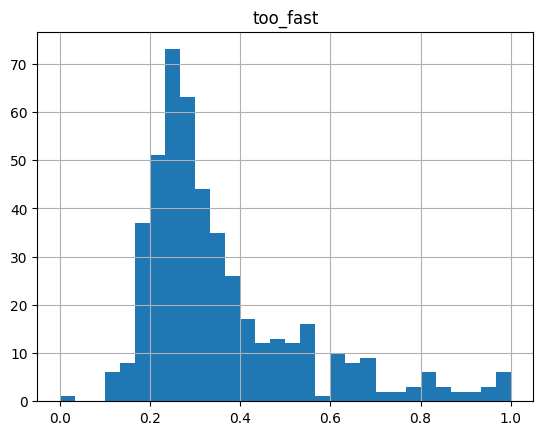

In [37]:
too_fast_stat.hist(bins=30)


Обратите внимание, что с короткими заездами всё не так радужно. Их гораздо больше. Есть АЗС, где коротких заправок большинство, а то и все 100%.

### Задача 7
Проблема сверхкоротких заправок зафиксирована. Проделаем то же самое с аномально долгими заправками.
Создайте столбец **data['too_slow']**, в котором будут значения:
•	True — если время заезда более 1000 секунд;
•	False — если время заезда менее или равно 1000 секундам.
Постройте гистограмму доли **too_slow** по разным АЗС (группируя по id). Данные для гистограммы делите на 30 корзин.


array([[<Axes: title={'center': 'too_slow'}>]], dtype=object)

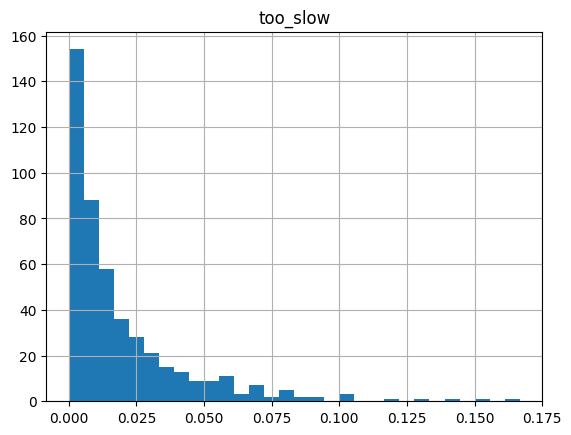

In [42]:
data['too_slow'] = data['time_spent'] > 1000
data['too_slow'] = data['too_slow'].astype("int")
too_slow_stat = pd.pivot_table(data, index='id', values=['too_slow'], aggfunc='mean')
too_slow_stat.hist(bins=30)

# Сохраняем результаты

Подведём итоги исследования.
Бывает, что заправляются долго. Причём повсюду. Только доля таких заправок невелика. В гистограммах заездов на АЗС с рекордно долгими заправками — ничего особенного, выглядят они ожидаемо.

Мы решили отбросить слишком долгие заезды (более 1000 секунд), а для надёжности вместо среднего арифметического времени рассчитывать медианное. Тогда эти заезды не исказят оценку типичной продолжительности заправки.
А вот с короткими заездами всё не так радужно. Их гораздо больше. Есть АЗС, где коротких заправок большинство, а то и все 100%. Что-то здесь не то.

Ошибка в исходных данных? Сформулируем проблему, чтобы упростить поиск потенциальной ошибки в алгоритме выгрузки данных. Правильное сообщение об ошибке, или баг-репорт (от англ. bug report, «сообщение об ошибке»), должно чётко объяснять, в чём именно ошибка и как её найти.

Мы часами исследовали данные, и хорошо понимаем суть проблемы. Коллеги, отвечающие за выгрузку, ничего этого не знают. Поэтому нужно чётко формулировать, где мы видим проблему. Для этого не подходит описание «слишком быстрые» или «пик около 0». Нужно быть точнее.

Мы видели гистограмму и решили, что проблемные заезды — те, что короче 60 секунд. Это и нужно сказать.
Следует сообщить, что мы видим проблему в том, что таких заправок слишком много (если бы такие заезды составляли 1% от всех данных, мы бы не сочиняли баг-репорт).

Облегчим работу коллег, сфокусируем их внимание на самой проблемной АЗС — там будет легче отловить ошибку. Или понять, что это не ошибка, а какое-то пока неведомое явление.

Найдём эту проблемную АЗС. Напомним, что  мы уже считали долю аномально быстрых заправок для каждой АЗС:


In [39]:
print(too_fast_stat.sort_values('too_fast', ascending=False).head())

          too_fast
id                
c96c61cd  1.000000
c527c306  1.000000
5372547e  1.000000
792b6ded  0.996253
bd1d0bb0  0.982044


Таких АЗС, где 100% заездов аномально быстрые, оказалось целых три! Наверное, их id нужно передать коллегам, чтобы они искали ошибку. Но сперва посмотрим сами.
Методом **describe()** оценим данные первой АЗС — **id 'c96c61cd'**:


In [40]:
data.query('id == "c96c61cd"').describe()

,time_spent,too_fast,too_slow
count,1.0,1.0,1.0
mean,5.0,1.0,0.0
std,NaN,NaN,NaN
min,5.0,1.0,0.0
25%,5.0,1.0,0.0
50%,5.0,1.0,0.0
75%,5.0,1.0,0.0
max,5.0,1.0,0.0


Всего 1 заезд. Это неудачный баг-репорт, ведь АЗС с одним заездом странная сама по себе. Если на ней и была какая-то проблема, не факт, что она массовая.
Для баг-репорта нужна «полноценная» АЗС с достаточным числом аномально быстрых заездов. Проверив аналогично следующие id в списке, мы обнаружили, что нормальная статистика есть только по АЗС '792b6ded':


In [41]:
data.query('id == "792b6ded"').describe()

,time_spent,too_fast,too_slow
count,4270.000000,4270.000000,4270.0
mean,5.448712,0.996253,0.0
std,8.597126,0.061106,0.0
min,0.000000,0.000000,0.0
25%,2.000000,1.000000,0.0
50%,3.000000,1.000000,0.0
75%,5.000000,1.000000,0.0
max,228.000000,1.000000,0.0


Больше 4000 заездов, но почти все очень-очень короткие. 75% укладывается в 5 секунд. Первый квартиль составляет 2 секунды. Это значит, что как минимум 25% укладывается в 2 секунды.
Это очень удачный пример для баг-репорта. Можно передать как сам id, так и статистику по этой АЗС.
